In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt

In [55]:
I=cv2.imread('/content/drive/MyDrive/FIPLab/Dataset/Yeast_Cells.png')

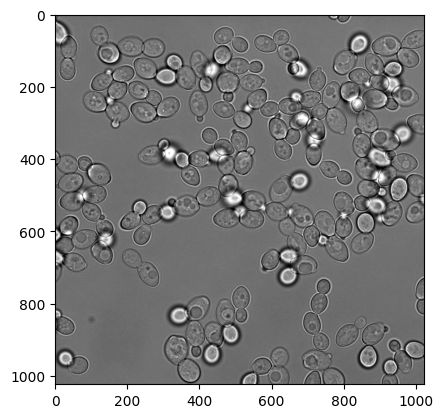

In [19]:
I1=cv2.imread('/content/drive/MyDrive/FIPLab/Dataset/Yeast_Cells.png',0)
plt.imshow(I1,'gray')
plt.axis
plt.show()

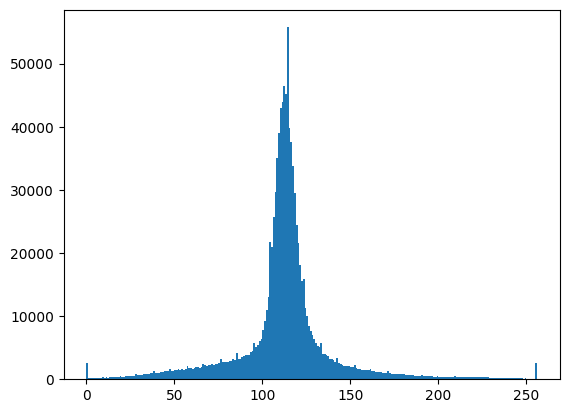

In [20]:
plt.hist(I1.ravel(),256,[0,256]); plt.show()

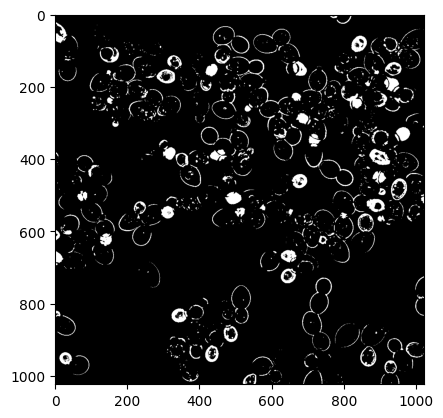

In [128]:
#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
r,B= cv2.threshold(I1,150,255,cv2.THRESH_BINARY)
plt.imshow(B,'gray')
plt.show()

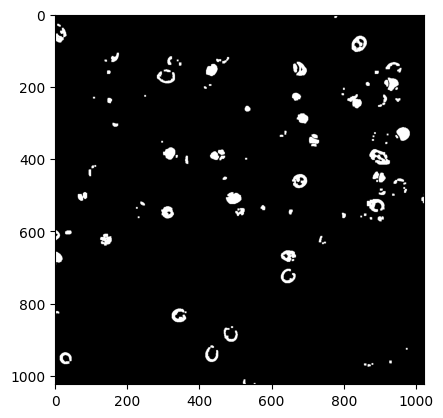

In [129]:
# Morphological operations to remove small noise - opening -> erosion followed by dilation
#Opening removes small objects from the foreground
k=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
B1=cv2.morphologyEx(B,cv2.MORPH_OPEN,k,iterations=2)
#B1=cv2.morphologyEx(B,cv2.MORPH_ERODE,k,iterations=2)
plt.imshow(B1,'gray')
plt.show()

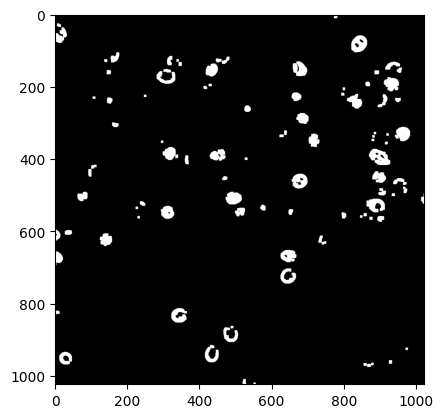

In [130]:
# let us start by identifying sure background area
# dilating pixes a few times increases object boundary to background.
# This way whatever is remaining for sure will be background.
#The area in between sure background and foreground is our ambiguous area.
Bag=cv2.dilate(B1,k,iterations=1)
plt.imshow(Bag,'gray')
plt.show()

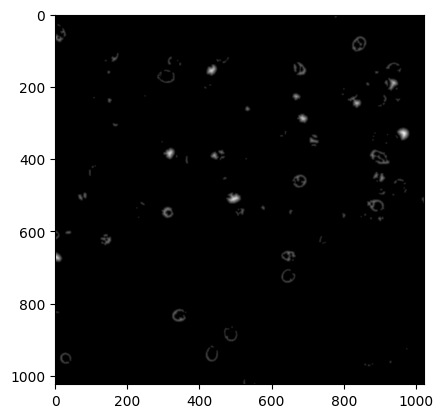

In [131]:
# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to
#distance their respective distances from the closest 0 value (boundary).
D=cv2.distanceTransform(B1,cv2.DIST_L2,5)
plt.imshow(D,'gray')
plt.show()

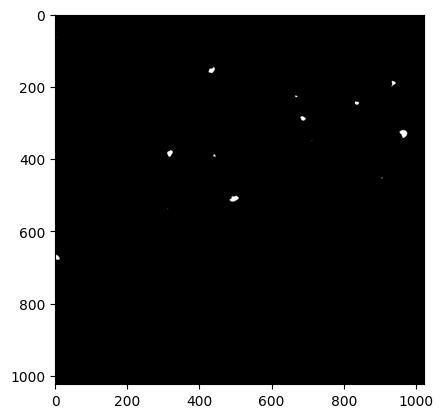

In [132]:
#Let us threshold the dist transform by starting at 1/2 its max value.
import numpy as np
r2,obj=cv2.threshold(D,0.5*D.max(),255,cv2.THRESH_BINARY)
obj=obj.astype(np.uint8)
plt.imshow(obj,'gray')
plt.show()

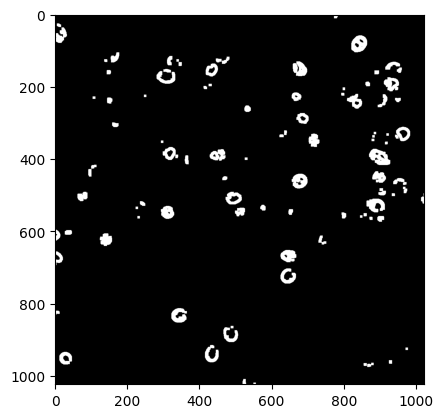

In [133]:
# Unknown ambiguous region is nothing but bkground - foreground
U=cv2.subtract(Bag,obj)
plt.imshow(U,'gray')
plt.show()

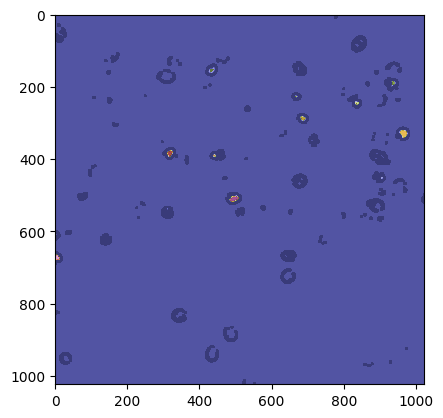

In [134]:
#Now we create a marker and label the regions inside.
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0.
#For markers let us use ConnectedComponents
r3,M=cv2.connectedComponents(obj)
M=M+1
# Now, mark the region of unknown with zero
M[U==255]=0
plt.imshow(M,'tab20b')
plt.show()

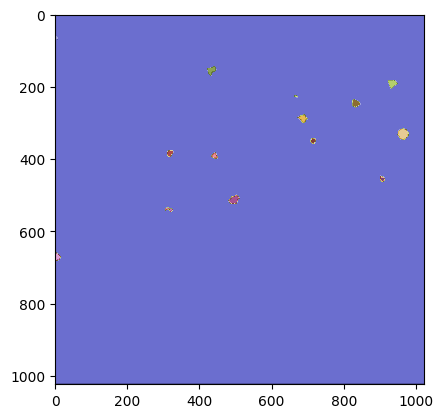

In [135]:
#Now we are ready for watershed filling.
M2=cv2.watershed(I,M)
plt.imshow(M2,'tab20b')
plt.show()

In [136]:
L=np.unique(M2)
New_img=[]

In [137]:
L

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32)

In [138]:
for l in L[2:]:
  T=np.where(M2==l,255,0).astype(np.uint8)
  c,h=cv2.findContours(T,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  New_img.append(c[0])

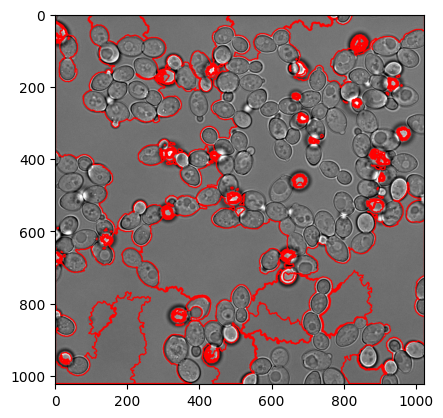

In [139]:
II=cv2.drawContours(I,New_img,-1,color=(255,0,0),thickness=2)
plt.imshow(II)
plt.show()